In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pprint import pprint

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


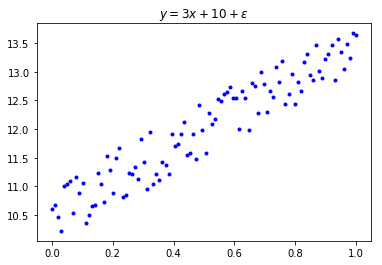

In [2]:
# --------------------------------generate data-------------------------------------
x_in = np.linspace(0, 1, 100)
y_true = 3*x_in + 10 + np.random.rand(len(x_in))

plt.plot(x_in, y_true, 'b.')
plt.title('$ y = 3x + 10 + \epsilon$')
plt.show()

In [3]:
tf.reset_default_graph()

In [4]:
# step 1
inputs = tf.placeholder(dtype=tf.float32, shape=[100], name='X')
y_label = tf.placeholder(dtype=tf.float32, shape=[100], name='label')

w1 = tf.Variable([0.5], dtype=tf.float32, name='weight')
b1 = tf.Variable([0.0], dtype=tf.float32, name='bias') 
y_pred = tf.add(tf.multiply(w1, inputs), b1, name='y_pred')  # y = w1*input + b1 --- (1)

# step 2
loss = tf.reduce_mean(tf.square(y_pred - y_label), name='mse')  # loss is a scaler. --- (2)

# step 3
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_ops = optim.minimize(loss)

init = tf.global_variables_initializer()

In [5]:
y_pred

<tf.Tensor 'y_pred:0' shape=(100,) dtype=float32>

In [6]:
pprint(tf.global_variables())

[<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>]


In [7]:
## train the model
sess = tf.Session()
print("-----start training-----")
sess.run(init)

for step in np.arange(500):
    sess.run(train_ops, feed_dict={inputs: x_in, y_label: y_true})  # update variables
    if step%25 == 0:
        print('step: {:3d}, weight: {:.3f}, bias: {:.3f}'.format(step, sess.run(w1)[0], sess.run(b1)[0]))
               
y_out = sess.run(y_pred, feed_dict={inputs: x_in})

-----start training-----
step:   0, weight: 1.719, bias: 2.353
step:  25, weight: 4.710, bias: 9.591
step:  50, weight: 4.220, bias: 9.860
step:  75, weight: 3.868, bias: 10.048
step: 100, weight: 3.617, bias: 10.183
step: 125, weight: 3.438, bias: 10.278
step: 150, weight: 3.311, bias: 10.347
step: 175, weight: 3.220, bias: 10.396
step: 200, weight: 3.155, bias: 10.431
step: 225, weight: 3.108, bias: 10.455
step: 250, weight: 3.075, bias: 10.473
step: 275, weight: 3.052, bias: 10.486
step: 300, weight: 3.035, bias: 10.495
step: 325, weight: 3.023, bias: 10.501
step: 350, weight: 3.014, bias: 10.506
step: 375, weight: 3.008, bias: 10.509
step: 400, weight: 3.004, bias: 10.512
step: 425, weight: 3.001, bias: 10.513
step: 450, weight: 2.998, bias: 10.514
step: 475, weight: 2.997, bias: 10.515


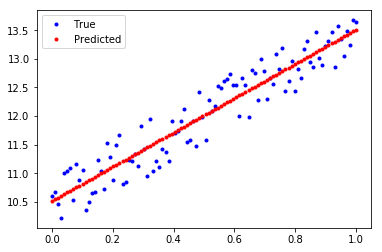

In [8]:
plt.plot(x_in, y_true, 'b.', label='True')
plt.plot(x_in, y_out, 'r.', label='Predicted')
plt.legend()
plt.show()

sess.close()

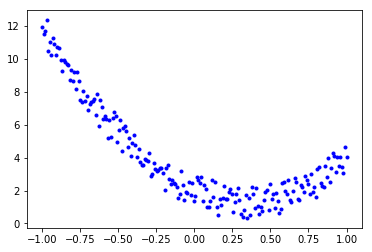

In [9]:
x_in = np.linspace(-1, 1, 200)
y_true = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2

plt.plot(x_in, y_true, 'b.')
plt.show()

In [10]:
# step 1
inputs = tf.placeholder(dtype=tf.float32, shape=[200], name='X')
y_label = tf.placeholder(dtype=tf.float32, shape=[200], name='label')

w1 = tf.Variable([0.5], dtype=tf.float32, name='weight')
b1 = tf.Variable([0.0], dtype=tf.float32, name='bias') 
y_pred = tf.add(tf.multiply(w1, inputs), b1, name='y_pred')  # y = w1*input + b1 --- (1)

# step 2
loss = tf.reduce_mean(tf.square(y_pred - y_label), name='mse')  # loss is a scaler. --- (2)

# step 3
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_ops = optim.minimize(loss)

init = tf.global_variables_initializer()

In [11]:
tf.reset_default_graph()
# step 1
inputs = tf.placeholder(dtype=tf.float32, shape=[200], name='X')
y_label = tf.placeholder(dtype=tf.float32, shape=[200], name='label')

w1 = tf.Variable([0.5], dtype=tf.float32, name='weight')
w2 = tf.Variable([0.5], dtype=tf.float32, name='weight2')
b1 = tf.Variable([0.0], dtype=tf.float32, name='bias') 
y_pred = tf.add(tf.multiply(w2, inputs), w1, name='y_pred')  # y = w1*input + b1 --- (1)
y_pred2 = tf.add(tf.multiply(y_pred, inputs), b1, name='y_pred')

# step 2
loss = tf.reduce_mean(tf.square(y_pred2 - y_label), name='mse')  # loss is a scaler. --- (2)

# step 3
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_ops = optim.minimize(loss)

init = tf.global_variables_initializer()

In [12]:
y_true.shape
y_pred2

<tf.Tensor 'y_pred_1:0' shape=(200,) dtype=float32>

In [13]:
pprint(tf.global_variables())

[<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'weight2:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>]


In [14]:
## train the model
sess = tf.Session()
print("-----start training-----")
sess.run(init)

for step in np.arange(500):
    sess.run(train_ops, feed_dict={inputs: x_in, y_label: y_true})  # update variables
    if step%25 == 0:
        print('step: {:3d}, weight: {:.3f}, bias: {:.3f}'.format(step, sess.run(w1)[0], sess.run(b1)[0]))
               
y_out2 = sess.run(y_pred2, feed_dict={inputs: x_in})

-----start training-----
step:   0, weight: 0.200, bias: 0.767
step:  25, weight: -3.225, bias: 2.993
step:  50, weight: -3.824, bias: 2.663
step:  75, weight: -3.929, bias: 2.440
step: 100, weight: -3.948, bias: 2.291
step: 125, weight: -3.951, bias: 2.192
step: 150, weight: -3.951, bias: 2.127
step: 175, weight: -3.952, bias: 2.083
step: 200, weight: -3.952, bias: 2.054
step: 225, weight: -3.952, bias: 2.034
step: 250, weight: -3.952, bias: 2.021
step: 275, weight: -3.952, bias: 2.013
step: 300, weight: -3.952, bias: 2.007
step: 325, weight: -3.952, bias: 2.003
step: 350, weight: -3.952, bias: 2.001
step: 375, weight: -3.952, bias: 1.999
step: 400, weight: -3.952, bias: 1.998
step: 425, weight: -3.952, bias: 1.997
step: 450, weight: -3.952, bias: 1.997
step: 475, weight: -3.952, bias: 1.996


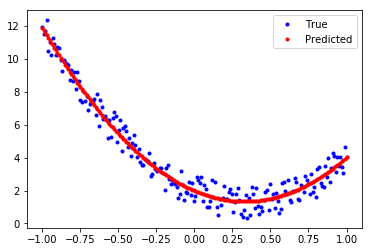

In [15]:
plt.plot(x_in, y_true, 'b.', label='True')
plt.plot(x_in, y_out2, 'r.', label='Predicted')
plt.legend()
plt.show()

sess.close()